## 딥러닝을 이용한 회귀분석

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 공부시간과 성적에 대한 상관/회귀 분석
x = [2,4,6,8]
y = [81,93,91,97]

(1.0, 9.0, 75.0, 100.0)

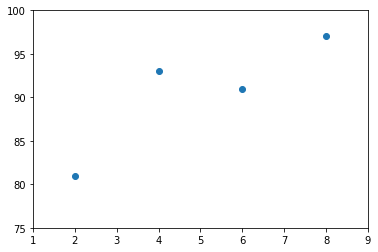

In [4]:
plt.scatter(x,y)
plt.axis([1,9,75,100])

In [5]:
# 텐서플로와 경사하강법을 이용한 선형회귀 예제
# x, y 데이터 설정
data = [[2,81],[4,93],[6,91],[8,97]]    # 2차원 텐서 정의
x_data = [x[0] for x in data]
y_data = [x[1] for x in data]

In [ ]:
# 기울기 a와 절편 b는 임의의 범위로 설정
# 기울기는 0~10, 절편은 0~100으로 설정
import tensorflow as tf
a = tf.Variable(tf.random_uniform([1], 0, 10,
                dtype=tf.float64, seed=1))
b = tf.Variable(tf.random_uniform([1], 0, 100,
                dtype=tf.float64, seed=1))

In [ ]:
# 선형회귀식 정의
y = a * x_data + b

In [ ]:
# 텐서플로에서 제공하는 평균제곱근 함수 사용
rmse = tf.sqrt(tf.reduce_mean(tf.square(y - y_data)))

In [ ]:
# 학습률 정의
learn_rate = 0.5

In [ ]:
# RMSE를 최소로 하는 값 찾기
gradient_decent = tf.train.GradientDescentOptimizer\
              (learn_rate).minimize(rmse)

In [ ]:
# 텐서플로로 학습 시도
with tf.Session() as sess:
    # 텐서플로 변수 초기화
    sess.run(tf.global_variables_initializer())
    # 학습횟수만큼 훈련 - 적절한 기울기 찾음
    # 총 학습횟수는 2000, 10회때마다 진행상황 출력
    for step in range(2001):
        sess.run(gradient_decent)
        if step % 100 == 0:
            print('훈련횟수 epoch %.f, RMSE %.3f,'\
            '기울기 %.3f, 절편 %.3f  %
                  ( step, sess.run(rmse),
                    sess.run(a), sess.run(b)))

#### 경사하강법 적용시 고려사항
* 학습률 : 기울기의 부호를 바뀌 이동시킬때 적절한 거리를 찾지 못해 너무 멀리 이동시키면 중심점을 지나칠수도 있음
    + 따라서, 어느 만큼 이동시킬지 신중히 결정해야 함
    + 케라스는 자동으로 이동거리를 조절해 줌

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
xtrain = [2,4,6,8]
ytrain = [81,93,91,97]

model = Sequential()
model.add(Dense(1, input_dim=1))

In [ ]:
# 비용계산 함수 : rmse
model.compile(loss='mse', optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
# 2500회의 학습 시행, 진행상황 표시
model.fit(xtrain, ytrain, epochs=2500, verbose=1)

In [ ]:
# 결과 출력
print('기울기 %.3f' % model.get_weights()[0])
print('절편 %.3f' % model.get_weights()[1])

In [ ]:
# 예측하기
ypredict = model.predict(np.array([55]))
print('55시간 공부하면 성적은', ypredict)

ypredict = model.predict(np.array([10]))
print('10시간 공부하면 성적은', ypredict)

In [ ]:
# 손실함수loss function
# 비용cost함수라고도 함
# 신경망이 잘 학습하고 있는지를 나타내주는 지표
# 손실loss,비용cost은 출력값과 실제값 사이의 오차를 의미
# 신경망에서는 이것들이 최소화되도록 하는 과정이 학습임
# 따라서, 손실이 최소화된다는 것은 학습이 잘되고 있음을 의미

# 딥러닝에서 손실함수는 평균제곱오차MSE(회귀)와
# 교차엔트로피오차CEE(분류)를 사용함

In [ ]:
# 학습 최적화 방법
# 텐서플로에서는 optimizer로 설정

# 경사하강법SGD - 확률적 경사하강법 : 무작위 값을 대입

# 모멘텀        - SGD + 무작위값에 탄성을 부여 (정확도 개선)

# 아다그라드adagrad - 학습률에 탄성을 부여 (보폭크기 개선)
#                     무작위값 대입 횟수를 조절

# RMSprop - adagrad의 보폭 민감도를 개선 (보폭크기 개선)

# Adam - 무작위값에 탄성부여, 학습률에도 탄성 부여
#          즉, 정확도 개선 + 보폭크기 개선
#       keras.optimizer.Adam(lr=0.0001,
#               beta_1=0.9, beta_2=0.9999,
#               elpsilon=1e-08, decay=0.0)